In [1]:
library(Seurat)
library(tidyverse)
source("/shareb//zliu//analysis/hires_gastrulation/CHARMtools/Rlibs/cellcycle_ana.R")
source("/shareb//zliu//analysis/hires_gastrulation/CHARMtools/Rlibs/plotFun.R")
source("/shareb//zliu//analysis/hires_gastrulation/CHARMtools/Rlibs/d3D.R")
library(patchwork)
library(ComplexHeatmap)
library(circlize)
library(plotly)

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

circlize version 0.4.13
CRAN page: https://c

In [2]:
hires <- readRDS("../../hires_mouse_emb_dev.new.rds")
hires <- subset(hires,subset = rmsd_20k < 1.5 & celltype != "mitosis" & celltype != "ExE ectoderm" & celltype != "ExE endoderm" & cellcycle_threshold != "M" & celltype != "blood")

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from cpg_umap_ to cpgumap_”
Warning message:
“Cannot add objects with duplicate keys (offending key: cpgumap_) setting key to original value 'cpg_umap_'”


In [3]:
celltypeColors = c(
"mitosis"="#bebebe","blood"="#ff9400",
"ExE endoderm"="#fec44f", "ExE ectoderm"="#cab2d6", 
"epiblast and PS"="#addd8e",
#neural
"neural ectoderm"="#AECBE6","NMP"="#96B9DB","neural tube"="#7EA8D0","notochord"="#6696C6","radial glias"="#4F85BB","oligodendrocytes and progenitors"="#3773B1","early neurons"="#1F62A6","schwann cell precursors"="#08519C",
#mesodermal
"early mesoderm"="#FC9272","ExE mesoderm"="#EF7F64","early mesenchyme"="#E36C57","intermediate mesoderm"="#D6594A", "myocytes"="#CA473C","mix late mesenchyme"="#BD342F",
"endoderm"="#fe9929","epithelial cells"="#fa9fb5"
)

# Filter raw di mat

In [ ]:
celltypes <- hires[[]] %>% pull(celltype) %>% unique()
chroms <- paste0("chr",seq(1:19))

for (celltype_now in celltypes){
    celltype_now = str_replace_all(celltype_now," ","_")
    celltype_now_markers <- map(paste0("di_all/",celltype_now,".",chroms,".tsv"),read_tsv) %>% bind_rows() %>% suppressMessages()
    celltype_now_markers <- celltype_now_markers %>% 
        mutate(FDR = p.adjust(pv,method = "BH")) %>% filter(FDR < 0.05) %>% ungroup() 
    celltype_now_markers %>% write_tsv(paste0("./di_filtered/",celltype_now,".filtered.differences"))
    
    print(paste0(celltype_now," is done!"))
}

In [5]:
celltypes <- hires[[]] %>% pull(celltype) %>% unique()
chroms <- paste0("chr",seq(1:19))
alltestable <- c()
for (celltype_now in celltypes){
    celltype_now = str_replace_all(celltype_now," ","_")
    celltype_now_markers <- map(paste0("di_all/",celltype_now,".",chroms,".tsv"),read_tsv) %>% bind_rows() %>% suppressMessages()
    alltestable <- rbind(celltype_now_markers,alltestable)
    
    print(paste0(celltype_now," is done!"))
}

[1] "neural_ectoderm is done!"
[1] "ExE_mesoderm is done!"
[1] "epithelial_cells is done!"
[1] "early_mesenchyme is done!"
[1] "early_mesoderm is done!"
[1] "endoderm is done!"
[1] "epiblast_and_PS is done!"
[1] "NMP is done!"
[1] "neural_tube is done!"
[1] "radial_glias is done!"
[1] "oligodendrocytes_and_progenitors is done!"
[1] "mix_late_mesenchyme is done!"
[1] "early_neurons is done!"
[1] "schwann_cell_precursors is done!"
[1] "intermediate_mesoderm is done!"
[1] "notochord is done!"
[1] "myocytes is done!"


In [6]:
alltestable <- alltestable %>% select(1:6) %>% unique()

In [7]:
alltestable %>% write_tsv("alltestable.tsv.gz")

In [8]:
celltype_now = "Random41"
chroms <- paste0("chr",seq(1:19))
celltype_now_markers <- map(paste0("di_all/",celltype_now,".",chroms,".tsv"),read_tsv) %>% bind_rows() %>% suppressMessages()

In [9]:
celltypes <- paste0("Random",seq(41,44))
for (celltype_now in celltypes){
    celltype_now = str_replace_all(celltype_now," ","_")
    celltype_now_markers <- map(paste0("di_all/",celltype_now,".",chroms,".tsv"),read_tsv) %>% bind_rows() %>% suppressMessages()
    celltype_now_markers <- celltype_now_markers %>% 
        mutate(FDR = p.adjust(pv,method = "BH")) %>% filter(FDR < 0.05) %>% ungroup() 
    celltype_now_markers %>% write_tsv(paste0("./di_filtered/",celltype_now,".filtered.differences"))
    
    print(paste0(celltype_now," is done!"))
}

celltypes <- paste0("Neuron_sample",c(50,100,150,200,250,300,400))
for (celltype_now in celltypes){
    celltype_now = str_replace_all(celltype_now," ","_")
    celltype_now_markers <- map(paste0("di_all/",celltype_now,".",chroms,".tsv"),read_tsv) %>% bind_rows() %>% suppressMessages()
    celltype_now_markers <- celltype_now_markers %>% 
        mutate(FDR = p.adjust(pv,method = "BH")) %>% filter(FDR < 0.05) %>% ungroup() 
    celltype_now_markers %>% write_tsv(paste0("./di_filtered/",celltype_now,".filtered.differences"))
    
    print(paste0(celltype_now," is done!"))
}

[1] "Random41 is done!"
[1] "Random42 is done!"
[1] "Random43 is done!"
[1] "Random44 is done!"
[1] "Neuron_sample50 is done!"
[1] "Neuron_sample100 is done!"
[1] "Neuron_sample150 is done!"
[1] "Neuron_sample200 is done!"
[1] "Neuron_sample250 is done!"
[1] "Neuron_sample300 is done!"
[1] "Neuron_sample400 is done!"


In [10]:
# get di used for analysis
celltypes_consider <- hires[[]] %>% pull(celltype) %>% unique()

alltypes <- c()
for (i in str_replace_all(celltypes_consider," ","_")){
    try(
    alltypes <- rbind(alltypes,read_tsv(paste0("di_filtered/",i,".filtered.differences")) %>% mutate(celltype = i))
        ) %>% suppressMessages()
}
alltypes %>% write_tsv("alldis.tsv.gz")
alltypes %>% filter(abs(diff) > 0.2) %>% write_tsv("alldis.filtered.tsv.gz")

In [11]:
# di_filtered_all
di_filtered_all <- alltypes %>% filter(abs(diff) > 0.2)

In [ ]:
chrom_mat_list_all <- list()
for (c in seq(1:19)){
    print(paste0("Chromosome ",c," processing!"))
    flush.console() 
    chrom_temp <- readRDS(paste0("di_mat/chr",as.character(c),".mat.rds.gz"))
    names_temp <- intersect(names(chrom_temp),di_filtered_all%>%filter(chrom1 == paste0("chr",c)) %>% pull(pos))
    chrom_mat_list_all[[c]] <- chrom_temp[,names_temp]
    print(paste0("Chromosome ",c," done!"))
    flush.console()
}
mat_all <- chrom_mat_list_all[[1]]
for (i in seq(1,19)){
    mat_all <- cbind(mat_all,chrom_mat_list_all[[i]])
}
mat_all <- mat_all[,di_filtered_all%>% pull(pos) %>% unique()]

[1] "Chromosome 1 processing!"


In [ ]:
mat_all %>% saveRDS("alldi_filtered_mat.rds.gz")

In [4]:
# restart 
di_filtered_all <- read_tsv("alldis.filtered.tsv.gz")
mat_all <- readRDS("alldi_filtered_mat.rds.gz")

Rows: 694384 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom1, chrom2, pos, celltype
dbl (9): start1, end1, start2, end2, pv, FDR, diff, mat1_mean_all, mat2_mean...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [19]:
alltypes <- read_tsv("alldis.tsv.gz")

Rows: 5689793 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): chrom1, chrom2, pos, celltype
dbl (9): start1, end1, start2, end2, pv, FDR, diff, mat1_mean_all, mat2_mean...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Dim reduction on DI

In [20]:
set.seed(42) 
bin_annotation <- di_filtered_all %>% sample_n(10000) %>% select(celltype,pos) %>% arrange(celltype)
bins_select <- bin_annotation %>% pull(pos) %>% unique()
distance_on_di <- mat_all[,bins_select]
distance_on_di <- distance_on_di[c(TRUE,FALSE),] + distance_on_di[c(FALSE,TRUE),]
distance_on_di <- as.data.frame(distance_on_di)
rownames(distance_on_di) <- rownames(distance_on_di) %>% str_remove("mat")

In [21]:
hires

An object of class Seurat 
146876 features across 3599 samples within 6 assays 
Active assay: scab (2405 features, 0 variable features)
 5 other assays present: RNA, SCT, cpg, cpggene, cdps
 13 dimensional reductions calculated: pca, umap, cpgpca, cpgumap, schicluster, schiclusterumap, cdpspca, cdpsumap, bandnorm, bandnorm_umap, cpg_umap, scabpca, scabumap

In [22]:
library(future)
plan("multiprocess", workers = 40)

In [23]:
mat <- distance_on_di %>% scale(center = T,scale = F) 
mat[is.na(mat)]<- 0
mat <- t(mat)
hires_di <- CreateSeuratObject(mat,assay = "di",min.cells = 0,min.features = 0)
hires_di
hires_di@meta.data <-hires_di@meta.data %>%rownames_to_column("cellname") %>%  left_join(hires[[]] %>% select(-orig.ident)) %>% mutate(temp = cellname) %>% column_to_rownames("temp")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
9941 features across 3599 samples within 1 assay 
Active assay: di (9941 features, 0 variable features)

Joining, by = "cellname"


In [24]:
dim(mat)

[1] 9941 3599

In [25]:
options(future.globals.maxSize= 891289600*20)
hires_di %>% #ScaleData(do.center = T,do.scale = T,vars.to.regress = c("cellcycle_threshold")) %>% 
    ScaleData(do.center=F,do.scale=F) %>% 
    RunPCA(verbose = F,features = rownames(hires_di),npcs = 200) -> hires_di

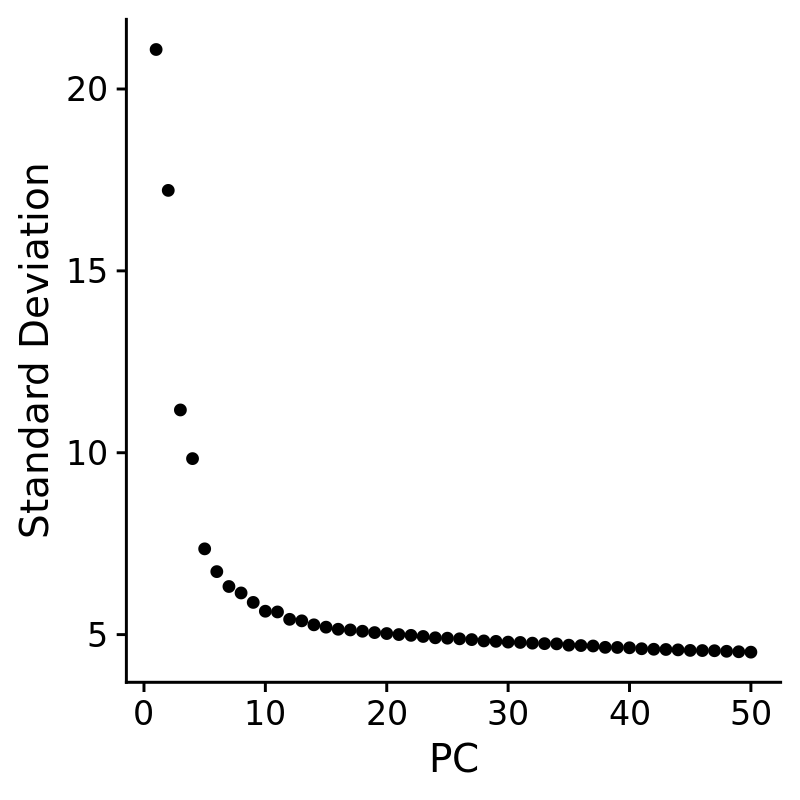

In [26]:
options(repr.plot.height = 4, repr.plot.width = 4,repr.plot.res = 200)
ElbowPlot(hires_di,ndims = 50)

In [27]:
hires_di %>% RunUMAP(dims = 1:40,verbose = F) -> hires_di

In [28]:
options(repr.plot.height = 4, repr.plot.width = 4,repr.plot.res = 200)
a <- DimPlot(hires_di,group.by = "celltype",cols = celltypeColors,pt.size = 0.05)  + ggtitle("") + xlab("DI UMAP_1") + ylab("DI UMAP_2") + theme_Publication()+ NoLegend()+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [29]:
b <- DimPlot(hires_di,group.by = "cellcycle_threshold",cols = cellcyclecolors,pt.size = 0.05)+ ggtitle("") + xlab("DI UMAP_1") + ylab("DI UMAP_2") + theme_Publication()+ NoLegend()+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank())

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


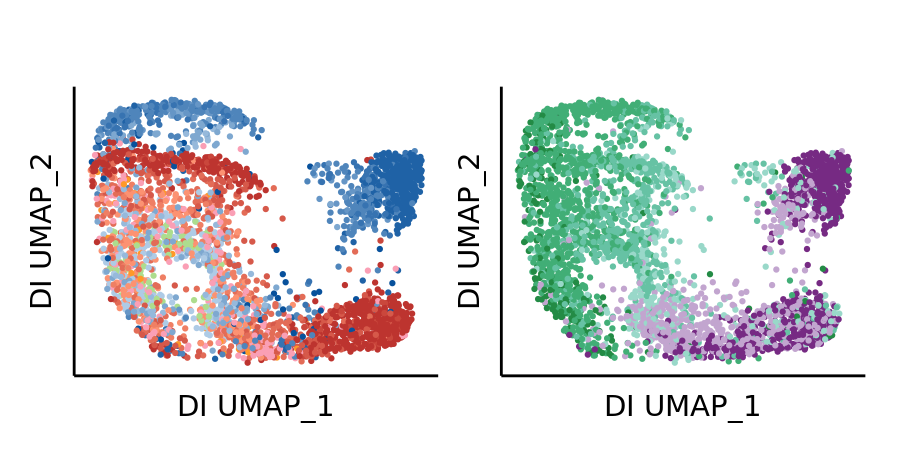

In [30]:
options(repr.plot.height = 1.5, repr.plot.width = 3,repr.plot.res = 300)
(a|b)

In [31]:
a %>% ggsave(filename = "plots/di_dimrec_uamp_celltype.pdf",width = 1.5,height = 1.5,dpi = 300)
b %>% ggsave(filename = "plots/di_dimrec_uamp_cellcycle.pdf",width = 1.5,height = 1.5,dpi = 300)

# DI stat and heatmap

In [32]:
# 画heatmap 的时候我们只考虑只在一种细胞类型里出现的情况，只选择在该类型中距离变近的情况，并随机选取了5000 个di

In [33]:
di_all <- alltypes

In [34]:
set.seed(42)
bin_annotation <- di_all %>% filter(diff < 0) %>% arrange(FDR) %>% group_by(pos) %>% mutate(count = n()) %>%
    filter(count == 1) %>% group_by(celltype) %>% arrange(FDR) %>% 
  filter(FDR < quantile(FDR, 0.05)) %>% ungroup() %>% sample_n(10000)

In [35]:
chrom_mat_list_all <- list()
for (c in seq(1:19)){
    print(paste0("Chromosome ",c," processing!"))
    flush.console() 
    chrom_temp <- readRDS(paste0("./di_mat/chr",as.character(c),".mat.rds.gz"))
    names_temp <- intersect(names(chrom_temp),bin_annotation %>% pull(pos))
    chrom_mat_list_all[[c]] <- chrom_temp[,names_temp]
    print(paste0("Chromosome ",c," done!"))
    flush.console()
}
mat_all <- chrom_mat_list_all[[1]]
for (i in seq(1,19)){
    mat_all <- cbind(mat_all,chrom_mat_list_all[[i]])
}

[1] "Chromosome 1 processing!"
[1] "Chromosome 1 done!"
[1] "Chromosome 2 processing!"
[1] "Chromosome 2 done!"
[1] "Chromosome 3 processing!"
[1] "Chromosome 3 done!"
[1] "Chromosome 4 processing!"
[1] "Chromosome 4 done!"
[1] "Chromosome 5 processing!"
[1] "Chromosome 5 done!"
[1] "Chromosome 6 processing!"
[1] "Chromosome 6 done!"
[1] "Chromosome 7 processing!"
[1] "Chromosome 7 done!"
[1] "Chromosome 8 processing!"
[1] "Chromosome 8 done!"
[1] "Chromosome 9 processing!"
[1] "Chromosome 9 done!"
[1] "Chromosome 10 processing!"
[1] "Chromosome 10 done!"
[1] "Chromosome 11 processing!"
[1] "Chromosome 11 done!"
[1] "Chromosome 12 processing!"
[1] "Chromosome 12 done!"
[1] "Chromosome 13 processing!"
[1] "Chromosome 13 done!"
[1] "Chromosome 14 processing!"
[1] "Chromosome 14 done!"
[1] "Chromosome 15 processing!"
[1] "Chromosome 15 done!"
[1] "Chromosome 16 processing!"
[1] "Chromosome 16 done!"
[1] "Chromosome 17 processing!"
[1] "Chromosome 17 done!"
[1] "Chromosome 18 processing!"


In [36]:
# Fig 3 B

# we only randomly sampled 5000 celltype specific "negative" di(more interaction strength in given celltype) for plot
set.seed(42) 
#bin_annotation <- di_all_sample %>% filter(diff < 0) %>% arrange(FDR) %>% group_by(pos) %>% mutate(count = n()) %>% filter(count == 1)%>% ungroup() %>% select(celltype,pos) %>% sample_n(5000,replace=T) %>% arrange(celltype)
bins_select <- bin_annotation %>% pull(pos) %>% unique()
distance_on_di <- mat_all[,bins_select]
distance_on_di <- distance_on_di[c(TRUE,FALSE),] + distance_on_di[c(FALSE,TRUE),]
distance_on_di <- as.data.frame(distance_on_di)
rownames(distance_on_di) <- rownames(distance_on_di) %>% str_remove("mat")

set.seed(42)
celltype_order <-  names(celltypeColors)

celltype_consider <- bin_annotation%>% pull(celltype)%>% unique() %>% str_replace_all("_"," ")
celltype_annotation <- hires[[]] %>% select(celltype) %>% arrange(celltype) %>% filter(celltype %in% celltype_consider)
celltype_annotation$celltype <- factor(celltype_annotation$celltype,levels = celltype_order)
celltype_annotation <- celltype_annotation %>% arrange(celltype)

leftAnno <- rowAnnotation(df= celltype_annotation ,col = list(celltype=celltypeColors),show_legend = FALSE,show_annotation_name = FALSE)

bin_annotation <- bin_annotation %>% mutate(celltype = str_replace_all(celltype,pattern = "_",replacement = " " )) %>% column_to_rownames("pos")
bin_annotation$celltype <- factor(bin_annotation$celltype,levels = celltype_order)
bin_annotation <- bin_annotation %>% arrange(celltype)

topAnno <- columnAnnotation(df=bin_annotation,col = list(celltype=celltypeColors),show_legend = FALSE,show_annotation_name = FALSE)

plotmatrix <- distance_on_di[rownames(celltype_annotation),rownames(bin_annotation)] %>% as.matrix()

In [37]:
summary_mat_data <- plotmatrix %>% as.data.frame() %>% rownames_to_column("cellname") %>% gather(bin,value,-cellname)
summary_mat_data <- summary_mat_data %>% left_join(bin_annotation %>% mutate(bin_celltype = celltype) %>% rownames_to_column("bin") %>% select(-celltype)) %>% 
                     left_join(celltype_annotation %>% mutate(cell_celltype = celltype) %>% rownames_to_column("cellname") %>% select(-celltype)) %>% 
    group_by(cell_celltype,bin)%>% summarise(value = mean(value,na.rm=T))

summary_mat_data <- summary_mat_data %>% left_join(bin_annotation %>% mutate(bin_celltype = celltype) %>% rownames_to_column("bin") %>% select(-celltype)) %>% 
                     left_join(celltype_annotation %>% mutate(cell_celltype = celltype) %>% rownames_to_column("cellname") %>% select(-celltype)) %>% 
    group_by(cell_celltype,bin)%>% summarise(value = mean(value,na.rm=T))
summary_mat_data <- summary_mat_data %>% spread(cell_celltype,value) %>% column_to_rownames("bin")%>% t() %>% scale(center = T,scale = F)

Joining, by = "bin"
Joining, by = "cellname"
`summarise()` has grouped output by 'cell_celltype'. You can override using the `.groups` argument.
Joining, by = "bin"
Joining, by = "cell_celltype"
`summarise()` has grouped output by 'cell_celltype'. You can override using the `.groups` argument.


In [38]:
# convert distace to interaction strength
summary_mat_data = - summary_mat_data

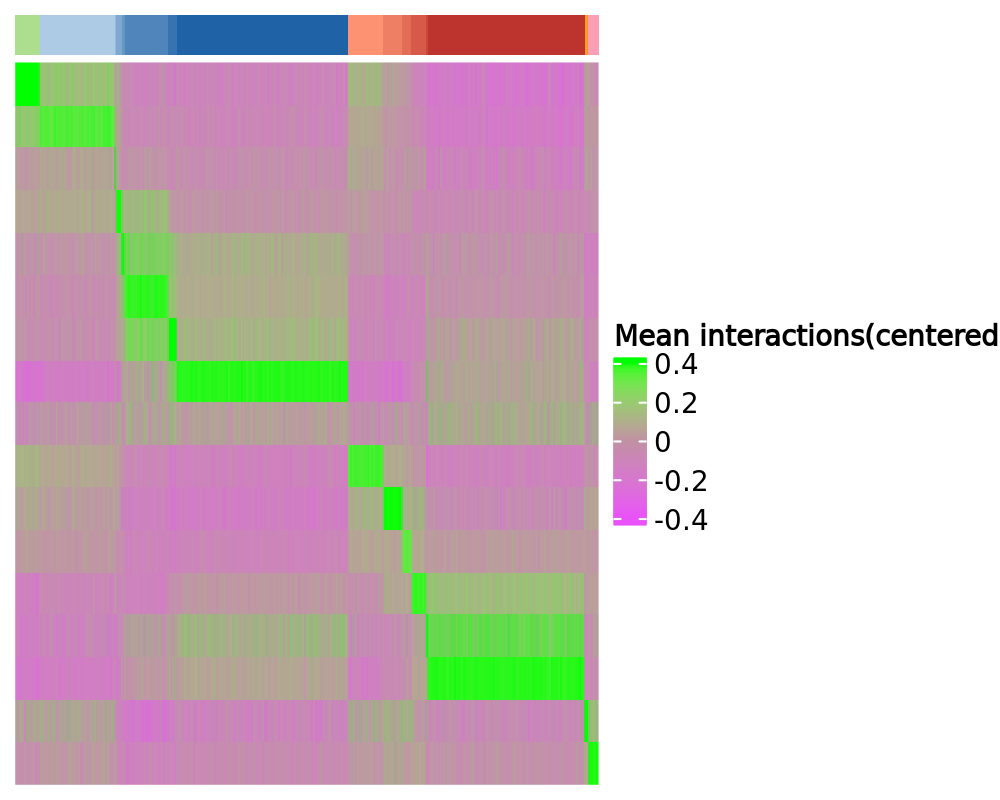

In [39]:
topAnno <- columnAnnotation(df=bin_annotation %>% select(celltype),col = list(celltype=celltypeColors),show_legend = FALSE,show_annotation_name=FALSE)
#col_fun = colorRamp2(seq(from = -0.4,to=0.4,length.out = 8), rev(c("#fafb16","#E8C931","#96C761","#53C689","#12ACD6","#2C84F6","#453AD9","#3d28af")))
col_fun = colorRamp2(seq(-0.4,0.4,length.out = 3), rev(c("#00FF00","#c091a3","#e952f8")))
options(repr.plot.height = 4, repr.plot.width = 5,repr.plot.res = 200)

summary_mat_data[,rownames(bin_annotation)] %>% 
    Heatmap(cluster_columns = FALSE,cluster_rows = FALSE,show_column_names = FALSE,show_row_names = FALSE,col=col_fun,
        heatmap_legend_param = list(title = "Mean interactions(centered)",direction = "vertical"),
        top_annotation = topAnno,use_raster = TRUE
    ) -> summary_heatmap
draw(summary_heatmap,heatmap_legend_side="right")

In [40]:
pdf("plots/di_heatmap.pdf",width = 6,height = 3,fonts = "Helvetica") 
# Code of the plot
draw(summary_heatmap,,heatmap_legend_side="right")
# Close the graphics device
dev.off() 

png 
  2

# Process on metacell

Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "ignore".”
Warning message:
“UNRELIABLE VALUE: One of the ‘future.apply’ iterations (‘future_lapply-1’) unexpectedly generated random numbers without declaring so. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'future.seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'future.seed = NULL', or set option 'future.rng.onMisuse' to "igno

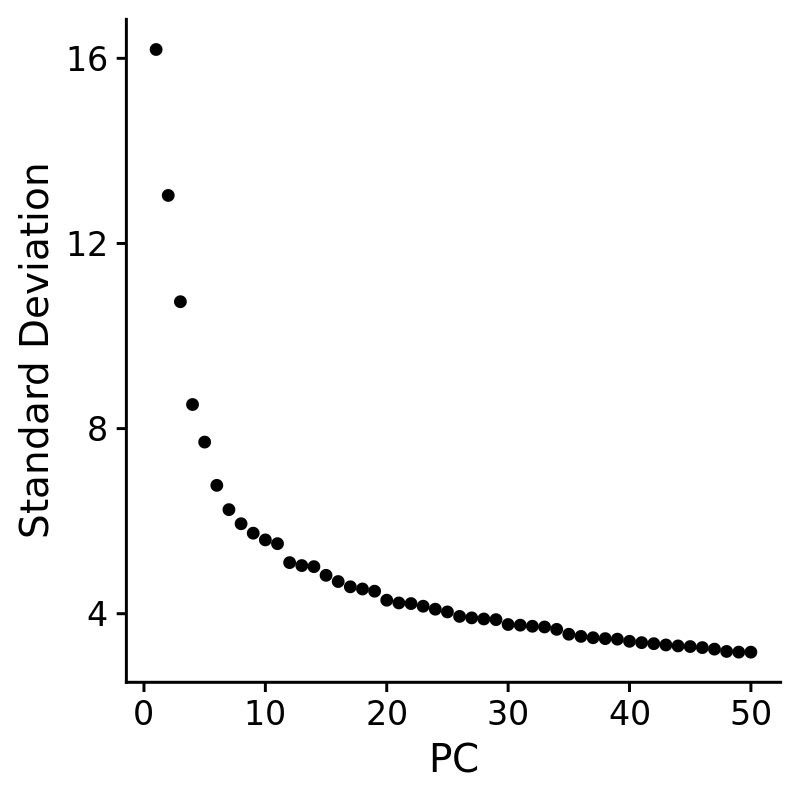

In [41]:
DefaultAssay(hires) <- "RNA"
hires <- SCTransform(hires,method="glmGamPoi",verbose = FALSE)
hires <- RunPCA(hires,verbose = FALSE)
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=200)
ElbowPlot(hires,ndims = 50)
hires <- FindNeighbors(hires, dims = 1:15,verbose=FALSE)
hires <- FindClusters(hires,resolution = 4,verbose=FALSE)
hires <- RunUMAP(hires, dims = 1:15,verbose=FALSE)
hires <- FindClusters(hires,resolution = 35,verbose=FALSE)

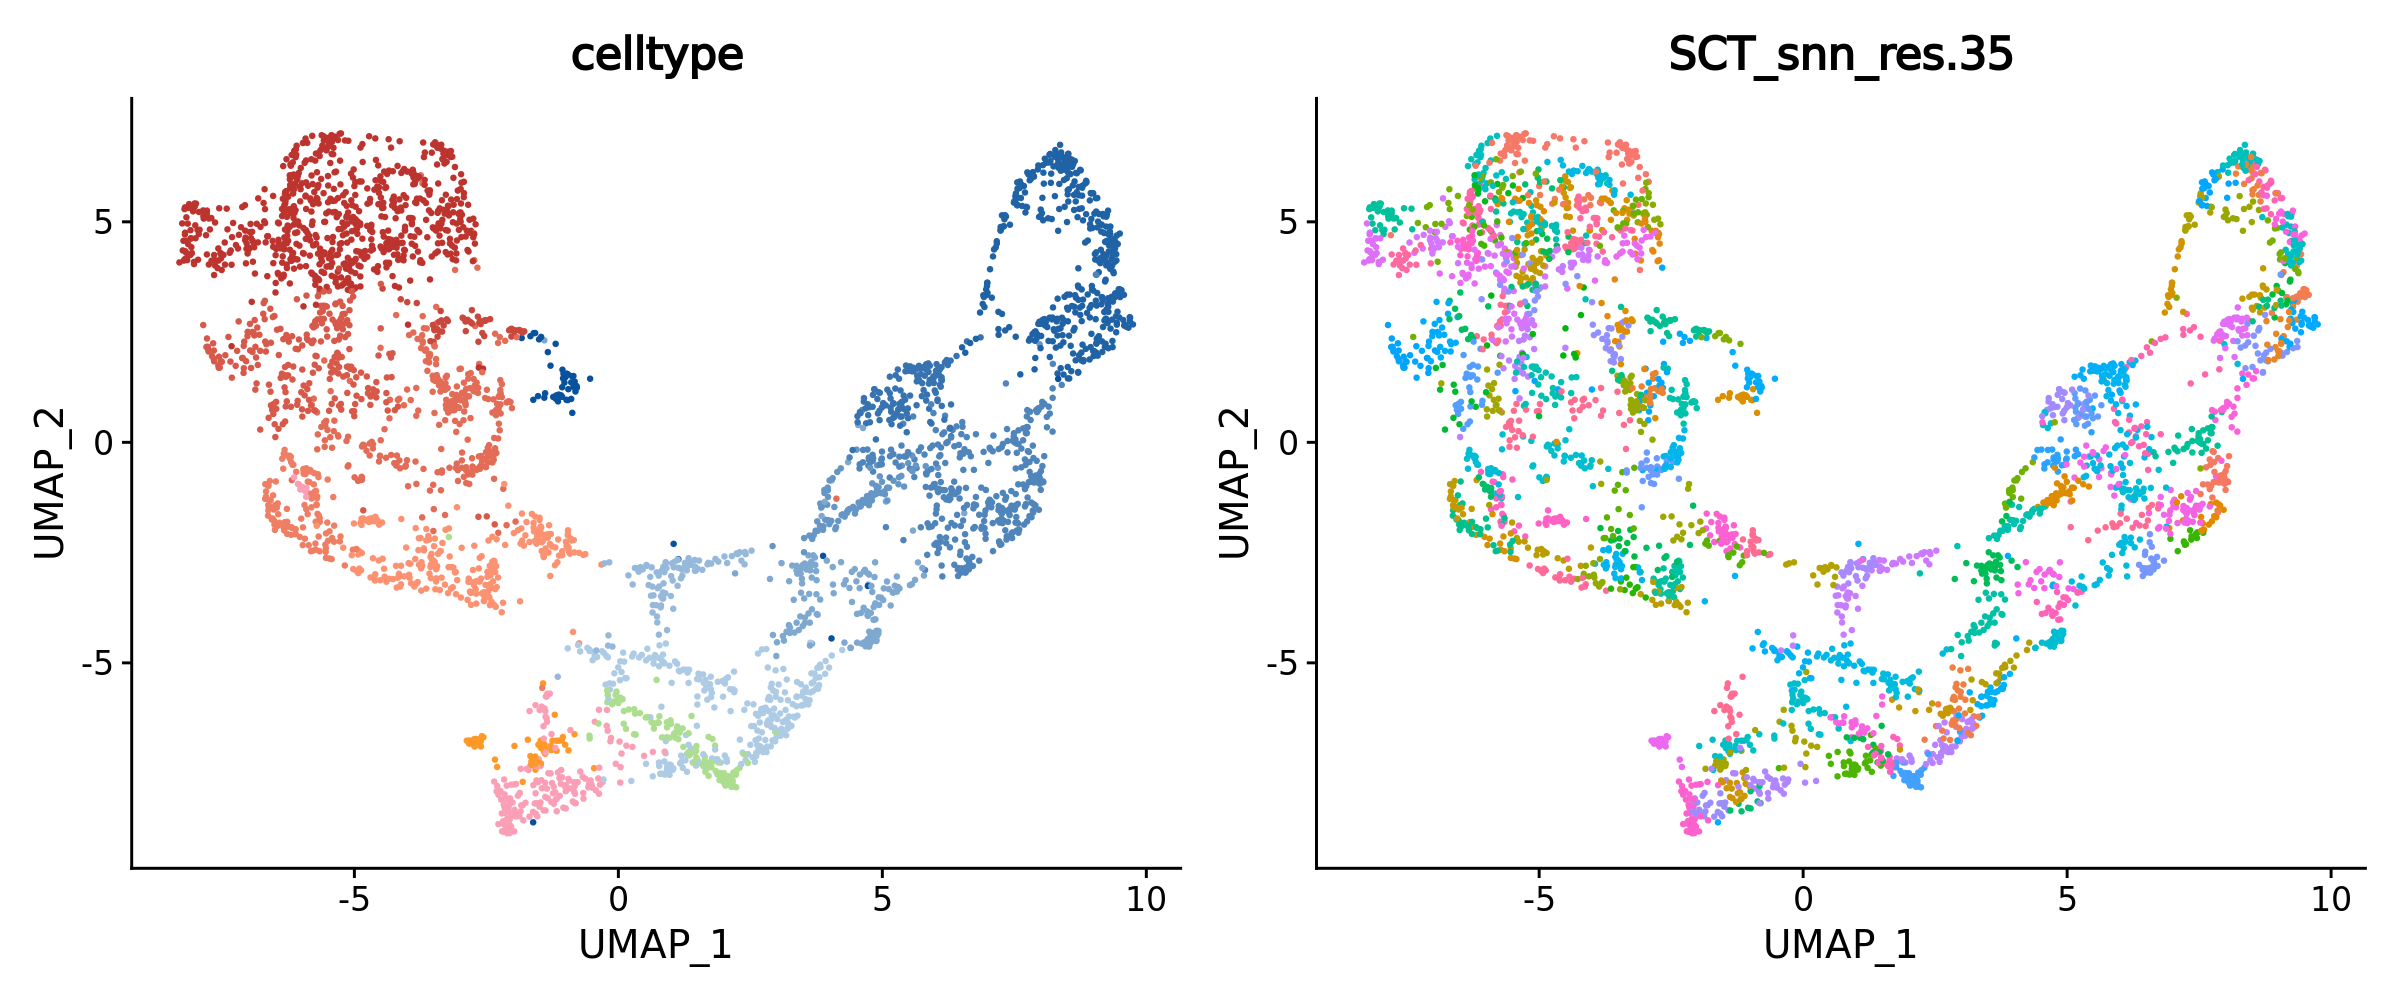

In [42]:
options(repr.plot.width=12, repr.plot.height=5,repr.plot.res=200)
a <- DimPlot(hires, reduction = "umap",group.by="celltype",cols = celltypeColors) + NoLegend()
b <- DimPlot(hires, reduction = "umap",group.by="SCT_snn_res.35") + NoLegend()
a|b

[1] 159   2

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


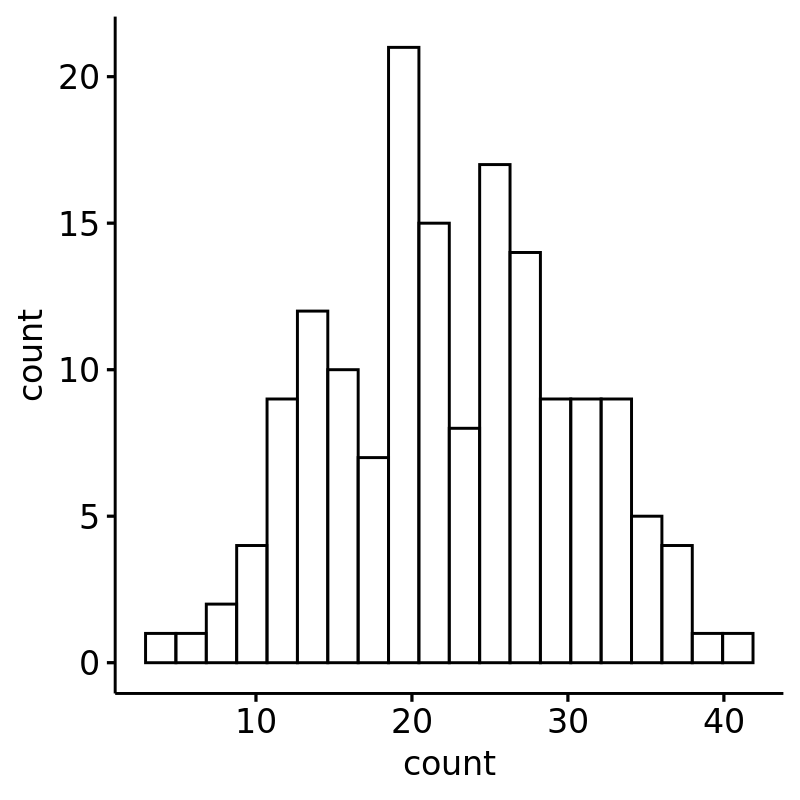

In [43]:
options(repr.plot.width=4, repr.plot.height=4,repr.plot.res=200)
hires[[]] %>% group_by(SCT_snn_res.35) %>% summarise(count = n()) %>% dim()
p <-hires[[]] %>% group_by(SCT_snn_res.35) %>% summarise(count = n()) %>% arrange(count) %>% gghistogram(x="count",bins=20)
p
p <- p + theme_Publication()
p %>% ggsave(filename = "plots/metacell_distribution.histogram.pdf",width = 1.5,height=1.5,dpi = 300)

In [44]:
metacell_assign <- hires[[]] %>% select(cellname,SCT_snn_res.35,celltype) %>% rename(mc_id = "SCT_snn_res.35") %>% mutate(mc_id = paste0("mc_",mc_id))

In [46]:
metacell_assign %>% write_tsv("metacellassign.tsv")

In [50]:
metacell_assign %>% group_by(mc_id) %>% summarise(count = n()) %>% summary()

    mc_id               count      
 Length:159         Min.   : 3.00  
 Class :character   1st Qu.:17.00  
 Mode  :character   Median :22.00  
                    Mean   :22.64  
                    3rd Qu.:28.00  
                    Max.   :40.00  

# get di metacell

In [97]:
library(foreach)
library(doParallel)

In [61]:
mat_all <- readRDS("alldi_filtered_mat.rds.gz")

In [58]:
di_filtered_all %>% dim()
di_filtered_all %>% filter(FDR < 0.05,abs(diff) > 0.2) %>% dim()

[1] 694384     13

[1] 694384     13

In [62]:
set.seed(42) 
bin_annotation <- di_filtered_all %>% select(celltype,pos) %>% group_by(celltype) %>% arrange(celltype)
bins_select <- bin_annotation  %>% pull(pos) %>% unique()
distance_on_di <- mat_all[,bins_select]
distance_on_di <- distance_on_di[c(TRUE,FALSE),] + distance_on_di[c(FALSE,TRUE),]
distance_on_di <- as.data.frame(distance_on_di)
rownames(distance_on_di) <- rownames(distance_on_di) %>% str_remove("mat")

chunk_size = 10000
split_num = floor(dim(distance_on_di)[2] / chunk_size)

set.seed(42)
registerDoParallel(40)
distance_on_di_mc <- foreach(i = seq(split_num), .combine = "cbind",.errorhandling = "stop") %dopar% 
{   
    distance_on_di[,((i-1)*chunk_size + 1):(i * chunk_size)]%>% rownames_to_column("cellname") %>% inner_join(metacell_assign) %>% 
    select(-cellname,-celltype) %>% group_by(mc_id) %>% summarise_all(mean,na.rm=T) %>% column_to_rownames("mc_id") 
}
distance_on_di_mc <- cbind(distance_on_di_mc,distance_on_di[,(dim(distance_on_di_mc)[2]+1):dim(distance_on_di)[2]]%>% rownames_to_column("cellname") %>% inner_join(metacell_assign) %>% 
    select(-cellname,-celltype) %>% group_by(mc_id) %>% summarise_all(mean,na.rm=T) %>% column_to_rownames("mc_id"))

ERROR: Error in {: task 1 failed - "undefined columns selected"


In [ ]:
dim(distance_on_di_mc)

In [53]:
mc_select= metacell_assign %>% group_by(mc_id) %>% summarise(count =n()) %>% filter(count >=5)%>% pull(mc_id)

In [54]:
length(mc_select)

[1] 158

In [119]:
distance_on_di_mc[mc_select,] -> distance_on_di_mc
distance_on_di_mc %>% saveRDS("mc_topdi_filtered_mat.rds.gz")

# Generate metacell obj with top di

In [55]:
distance_on_di_mc <- readRDS("mc_topdi_filtered_mat.rds.gz")

In [63]:
set.seed(42)
distance_on_di_mc_sample <- t(distance_on_di_mc) %>% as.data.frame() %>% sample_n(10000) %>% as.matrix()

In [72]:
set.seed(42)
distance_on_di_mc_sample %>% CreateSeuratObject(assay = "mc_di") -> mc_hires_sample
mc_hires_sample %>% ScaleData(do.center=T,do.scale=T) %>% RunPCA(verbose = F,features = rownames(mc_hires),npcs = 50,reduction.name = "mcdi_pca") -> mc_hires_sample

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix



In [73]:
mc_hires_sample@meta.data <- cbind(mc_hires_sample[[]],mc_hires[[]])

In [81]:
mc_hires_sample %>% RunUMAP(dims = 1:40,verbose = F,reduction = "mcdi_pca",reduction.name = "mcdi_umap") -> mc_hires_sample

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


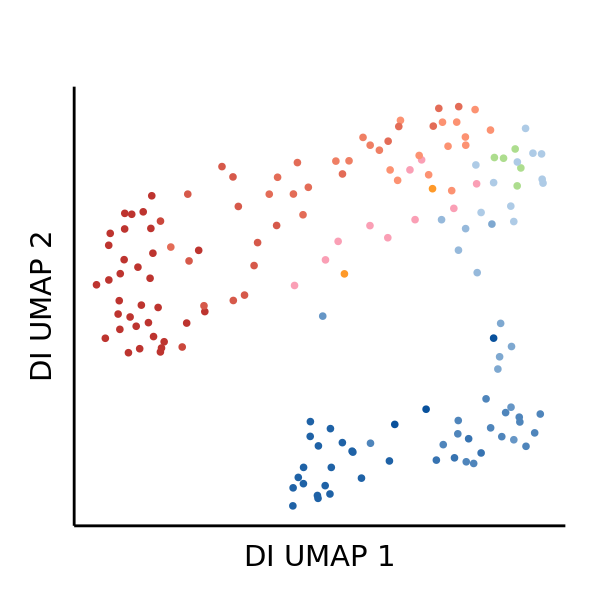

In [82]:
options(repr.plot.height = 5, repr.plot.width = 5 ,repr.plot.res = 200)
p <- DimPlot(mc_hires_sample,group.by = "celltype",cols = celltypeColors,reduction = "mcdi_umap",label=F,pt.size = 0.2) + theme_Publication() +NoLegend() 
p <- p+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("") + xlab("DI UMAP 1") + ylab("DI UMAP 2")

options(repr.plot.height = 2, repr.plot.width = 2 ,repr.plot.res = 300)
p
p %>% ggsave(filename = "plots/DI_metacell_umap_sample.pdf",width = 1.5,height=1.5,dpi = 300)

# Generate metacell object

In [181]:
set.seed(42)
distance_on_di_mc %>% t() %>% CreateSeuratObject(assay = "mc_di") -> mc_hires
mc_hires %>% ScaleData(do.center=T,do.scale=T) %>% RunPCA(verbose = F,features = rownames(mc_hires),npcs = 50,reduction.name = "mcdi_pca") -> mc_hires

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Centering and scaling data matrix



In [182]:
metacell_annotation <- metacell_assign %>% group_by(mc_id,celltype) %>% summarise(count = n()) %>% 
    arrange(desc(count)) %>% group_by(mc_id) %>% slice(1) %>% ungroup() %>% select(mc_id,celltype) %>% arrange(celltype)
metacell_annotation$celltype <- factor(metacell_annotation$celltype,levels = names(celltypeColors))
metacell_annotation %>% arrange(celltype) %>% column_to_rownames("mc_id") -> metacell_annotation

`summarise()` has grouped output by 'mc_id'. You can override using the `.groups` argument.


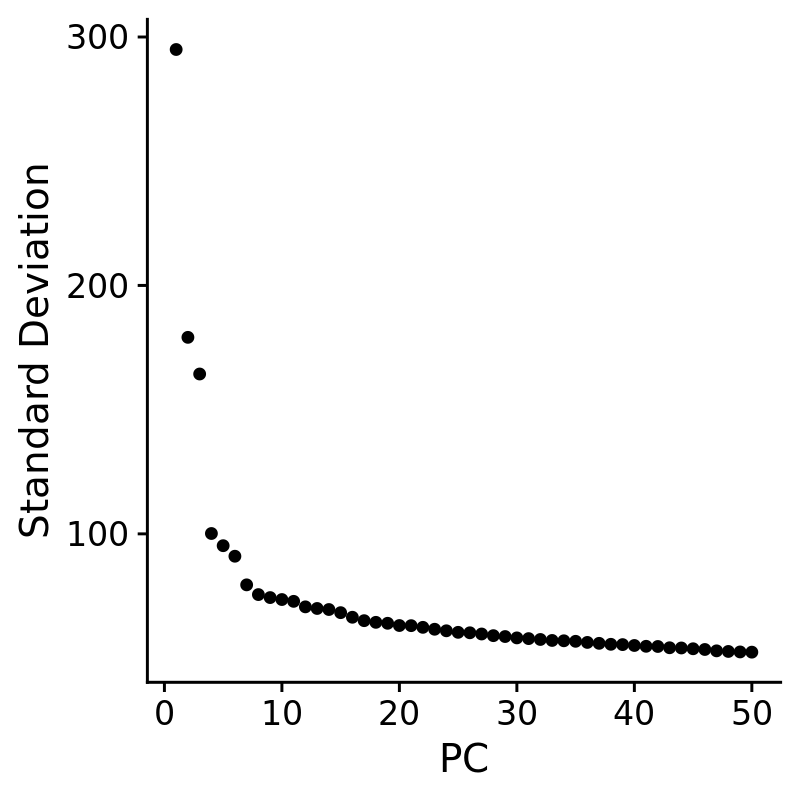

In [183]:
options(repr.plot.height = 4, repr.plot.width = 4 ,repr.plot.res = 200)
mc_hires@meta.data <- cbind(mc_hires[[]],metacell_annotation[mc_select,])
ElbowPlot(mc_hires,ndims = 50,reduction = "mcdi_pca")

In [33]:
DefaultAssay(mc_hires) <- "mc_di"

In [ ]:
#120

In [113]:
mc_hires %>% RunUMAP(dims = 1:40,verbose = F,reduction = "mcdi_pca",reduction.name = "mcdi_umap",seed.use = 130) -> mc_hires

In [114]:
options(repr.plot.height = 5, repr.plot.width = 5 ,repr.plot.res = 200)
p <- DimPlot(mc_hires,group.by = "celltype",cols = celltypeColors,reduction = "mcdi_umap",label=F,pt.size = 0.2) + theme_Publication() +NoLegend() 
p <- p+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("") + xlab("DI UMAP 1") + ylab("DI UMAP 2")

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


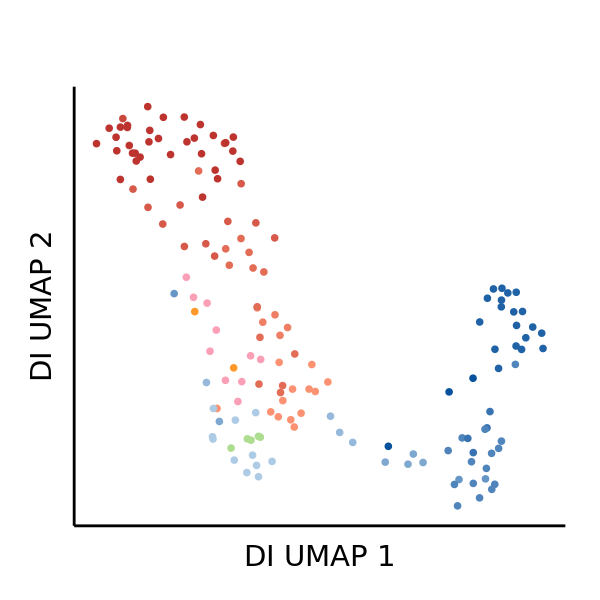

In [115]:
options(repr.plot.height = 2, repr.plot.width = 2 ,repr.plot.res = 300)
p
p %>% ggsave(filename = "plots/DI_metacell_umap.pdf",width = 2,height=2,dpi = 300)

In [78]:
mc_sct_mat <- hires[["SCT"]]@data %>% as.matrix() %>% t() %>% as.data.frame() %>% 
    rownames_to_column("cellname") %>% left_join(metacell_assign %>% select(-celltype)) %>% group_by(mc_id) %>% 
    select(-cellname) %>% summarise_all(mean,na.rm=T)

ERROR: Error in select(., -celltype): object 'metacell_assign' not found


In [190]:
mc_sct_mat <- mc_sct_mat %>% filter(mc_id %in% mc_select) %>% column_to_rownames("mc_id")%>% t()

In [191]:
mc_hires[["mc_sct"]] <- CreateAssayObject(mc_sct_mat)

Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from mc_sct_ to mcsct_”


In [192]:
DefaultAssay(mc_hires) <- "mc_sct"

In [193]:
FindVariableFeatures(mc_hires) -> mc_hires
mc_hires %>% ScaleData(do.center=T,do.scale=T) %>% RunPCA(verbose = F,features = VariableFeatures(mc_hires),npcs = 50,reduction.name = "mcsct_pca") -> mc_hires

Centering and scaling data matrix

Warning message:
“Cannot add objects with duplicate keys (offending key: PC_), setting key to 'mcsct_pca_'”


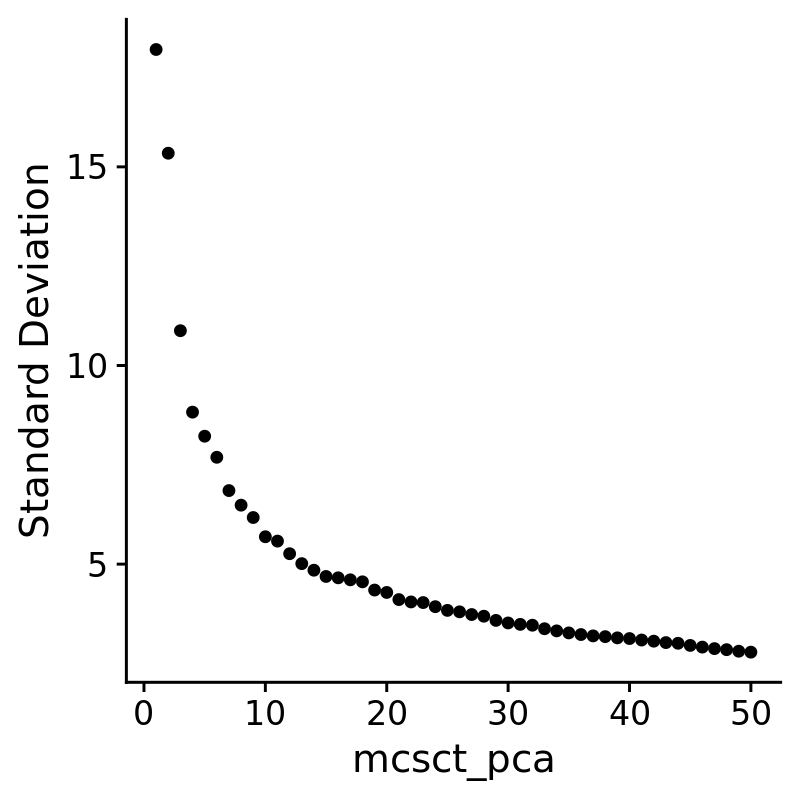

In [194]:
options(repr.plot.height = 4, repr.plot.width = 4 ,repr.plot.res = 200)
ElbowPlot(mc_hires,ndims = 50,reduction = "mcsct_pca")

Warning message:
“Cannot add objects with duplicate keys (offending key: UMAP_) setting key to original value 'mcsct_umap_'”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


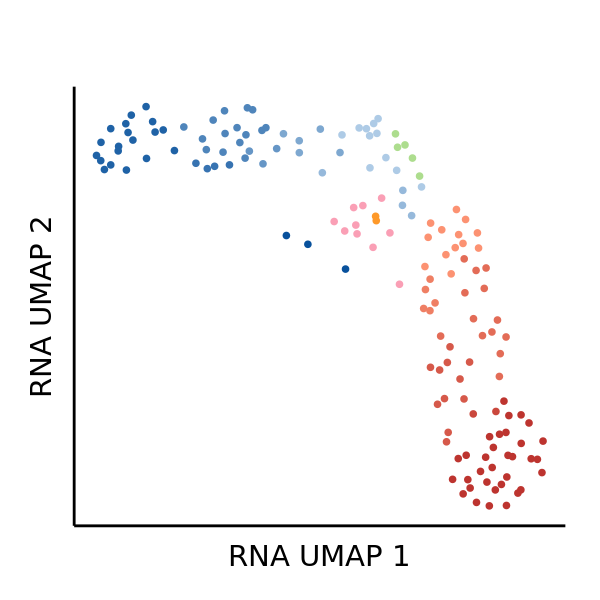

In [219]:
mc_hires %>% RunUMAP(dims = 1:40,verbose = F,reduction.name = "mcsct_umap",reduction = "mcsct_pca") -> mc_hires

options(repr.plot.height = 2, repr.plot.width = 2 ,repr.plot.res = 300)
p <- DimPlot(mc_hires,group.by = "celltype",cols = celltypeColors,reduction = "mcsct_umap",label=F,pt.size = 0.2) + theme_Publication() +NoLegend() 
p <- p+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p

In [220]:
p %>% ggsave(filename = "plots/RNA_metacell_umap.pdf",width = 2,height=2,dpi = 300)

In [217]:
# temp save 
mc_hires %>% saveRDS("hires_emb_metacell.rds")

In [68]:
mc_hires <- readRDS("hires_emb_metacell.rds")

In [20]:
mc_hires

An object of class Seurat 
571318 features across 158 samples within 2 assays 
Active assay: mc_di (535780 features, 0 variable features)
 1 other assay present: mc_sct
 4 dimensional reductions calculated: mcdi_pca, mcdi_umap, mcsct_pca, mcsct_umap

In [21]:
DefaultAssay(mc_hires) <- "mc_sct"

In [23]:
VariableFeatures(mc_hires) %>% length()

[1] 2000

# Pseudotime by palantir

In [198]:
library(SeuratDisk)

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [199]:
mc_hires@meta.data$celltype <- as.character(mc_hires@meta.data$celltype)

In [201]:
SaveH5Seurat(mc_hires, filename = "scanpy/mc_hires_sct.h5Seurat")
Convert("scanpy/mc_hires_sct.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for mc_di

Adding data for mc_di

Adding scale.data for mc_di

No variable features found for mc_di

No feature-level metadata found for mc_di

Adding counts for mc_sct

Adding data for mc_sct

Adding scale.data for mc_sct

Adding variable features for mc_sct

Adding feature-level metadata for mc_sct

Adding cell embeddings for mcdi_pca

Adding loadings for mcdi_pca

No projected loadings for mcdi_pca

Adding standard deviations for mcdi_pca

No JackStraw data for mcdi_pca

Adding cell embeddings for mcdi_umap

No loadings for mcdi_umap

No projected loadings for mcdi_umap

No standard deviations for mcdi_umap

No JackStraw data for mcdi_umap

Adding cell embeddings for mcsct_pca

Adding loadings for mcsct_pca

No projected loadings for mcsct_pca

Adding standard deviations for mcsct_pca

No JackStraw data for mcsct_pca

Adding cell embeddings for mcsct_umap

No loadings for mcsct_umap

No projected loadings for mcsct_umap

N

In [202]:
DefaultAssay(mc_hires) <- "mc_di"

In [203]:
SaveH5Seurat(mc_hires, filename = "scanpy/mc_hires_di.h5Seurat")
Convert("scanpy/mc_hires_di.h5Seurat", dest = "h5ad")

Creating h5Seurat file for version 3.1.5.9900

Adding counts for mc_di

Adding data for mc_di

Adding scale.data for mc_di

No variable features found for mc_di

No feature-level metadata found for mc_di

Adding counts for mc_sct

Adding data for mc_sct

Adding scale.data for mc_sct

Adding variable features for mc_sct

Adding feature-level metadata for mc_sct

Adding cell embeddings for mcdi_pca

Adding loadings for mcdi_pca

No projected loadings for mcdi_pca

Adding standard deviations for mcdi_pca

No JackStraw data for mcdi_pca

Adding cell embeddings for mcdi_umap

No loadings for mcdi_umap

No projected loadings for mcdi_umap

No standard deviations for mcdi_umap

No JackStraw data for mcdi_umap

Adding cell embeddings for mcsct_pca

Adding loadings for mcsct_pca

No projected loadings for mcsct_pca

Adding standard deviations for mcsct_pca

No JackStraw data for mcsct_pca

Adding cell embeddings for mcsct_umap

No loadings for mcsct_umap

No projected loadings for mcsct_umap

N

In [213]:
di_pseudotime <- read_csv("pseudotime.di.csv")
names(di_pseudotime) <- c("mc_id","di_pseudotime")
sct_pseudotime <- read_csv("pseudotime.sct.csv")
names(sct_pseudotime) <- c("mc_id","sct_pseudotime")

New names:
* `` -> ...1

Rows: 158 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (1): 0

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
* `` -> ...1

Rows: 158 Columns: 2
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ...1
dbl (1): 0

ℹ Use `spec()` to retrieve the full column specificati

Joining, by = "mc_id"
`geom_smooth()` using method = 'loess' and formula 'y ~ x'



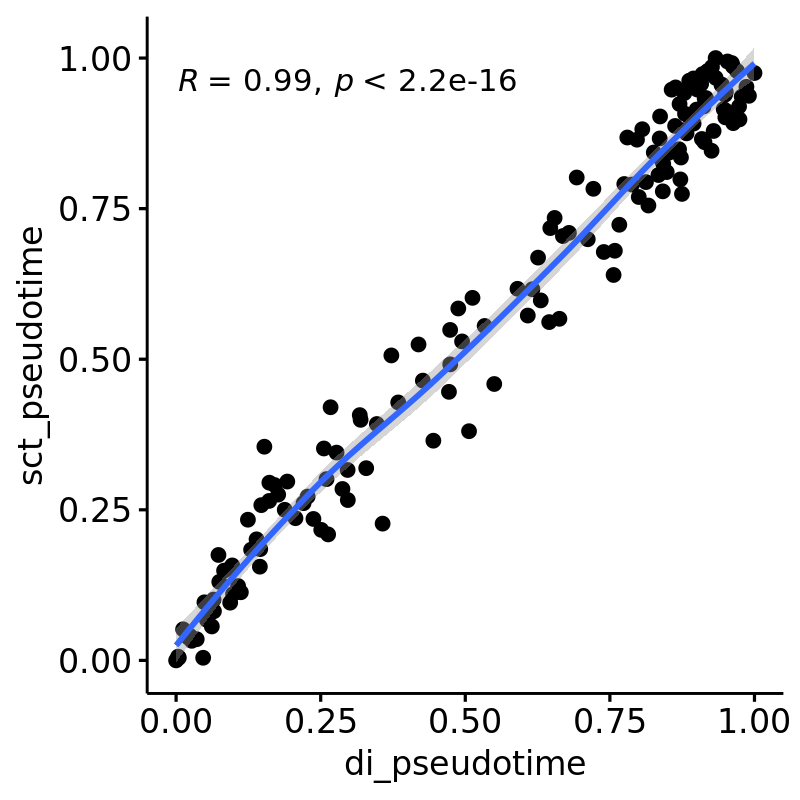

In [214]:
di_pseudotime %>% left_join(sct_pseudotime) %>% ggscatter(x="di_pseudotime",y="sct_pseudotime",cor.coef = T) + geom_smooth()

In [226]:
options(repr.plot.height = 2, repr.plot.width = 2 ,repr.plot.res = 300)
p <- di_pseudotime %>% left_join(sct_pseudotime) %>% ggscatter(x="di_pseudotime",y="sct_pseudotime",cor.coef = T,size =0.2) + theme_Publication() 
p %>% ggsave(filename = "plots/pseudotime_correlation.pdf",width = 1.5,height=1.5,dpi = 300)

Joining, by = "mc_id"
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


In [233]:
di_pseudotime %>% left_join(sct_pseudotime) %>% head()

Joining, by = "mc_id"


mc_id,di_pseudotime,sct_pseudotime
<chr>,<dbl>,<dbl>
mc_0,0.72149858,0.78293654
mc_1,0.83678367,0.90302904
mc_10,0.88257559,0.87498646
mc_100,0.86361621,0.95125243
mc_101,0.84151182,0.77869830
mc_102,0.06541436,0.08161317


In [236]:
mc_hires[[]] %>% rownames_to_column("mc_id") %>% mutate(temp = mc_id) %>% left_join(di_pseudotime %>% left_join(sct_pseudotime)) %>% column_to_rownames("temp") -> mc_hires@meta.data

Joining, by = "mc_id"
Joining, by = "mc_id"


Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


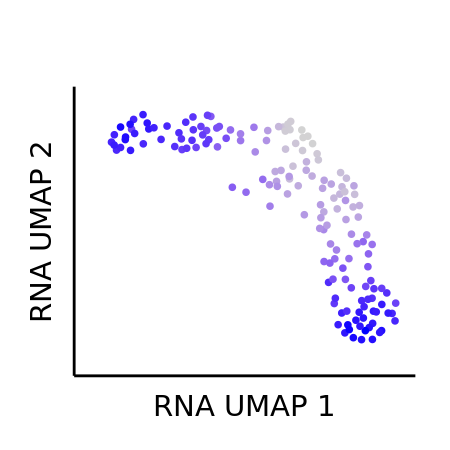

In [244]:
options(repr.plot.height = 1.5, repr.plot.width = 1.5 ,repr.plot.res = 300)
p <- FeaturePlot(mc_hires,features = "sct_pseudotime",reduction = "mcsct_umap",label=F,pt.size = 0.2) + theme_Publication() +NoLegend() 
p <- p+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("") + xlab("RNA UMAP 1") + ylab("RNA UMAP 2")
p
p %>% ggsave(filename = "plots/RNA_pseudotime_metacell_umap.pdf",width = 1.5,height=1.5,dpi = 300)

Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


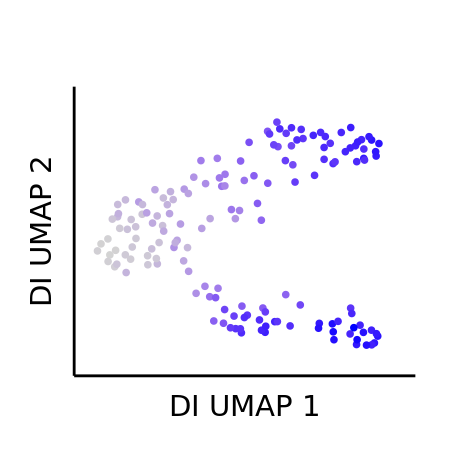

In [245]:
options(repr.plot.height = 1.5, repr.plot.width = 1.5 ,repr.plot.res = 300)
p <- FeaturePlot(mc_hires,features = "di_pseudotime",reduction = "mcdi_umap",label=F,pt.size = 0.2) + theme_Publication() +NoLegend() 
p <- p+ theme(axis.ticks.x = element_blank(),
        axis.text.x = element_blank(),
         axis.ticks.y = element_blank(),
          axis.text.y = element_blank()) + ggtitle("") + xlab("DI UMAP 1") + ylab("DI UMAP 2")
p
p %>% ggsave(filename = "plots/DI_pseudotime_metacell_umap.pdf",width = 1.5,height=1.5,dpi = 300)

In [246]:
mc_hires %>% saveRDS("hires_emb_metacell.rds")